In [19]:
# Install dependencies for this notebook (shouldn't be required on Google Colab)
%pip install matplotlib
%pip install numpy
%pip install torch

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


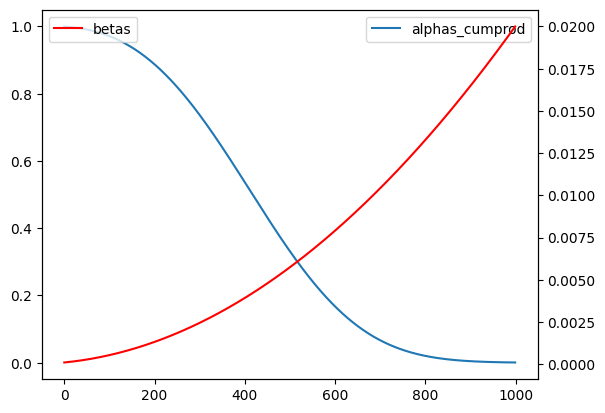

betas: tensor([1.0000e-04, 1.0265e-04, 1.0533e-04, 1.0805e-04, 1.1080e-04, 1.1359e-04,
        1.1641e-04, 1.1927e-04, 1.2216e-04, 1.2508e-04, 1.2804e-04, 1.3104e-04,
        1.3406e-04, 1.3713e-04, 1.4023e-04, 1.4336e-04, 1.4653e-04, 1.4973e-04,
        1.5297e-04, 1.5624e-04, 1.5954e-04, 1.6288e-04, 1.6626e-04, 1.6967e-04,
        1.7311e-04, 1.7659e-04, 1.8011e-04, 1.8365e-04, 1.8724e-04, 1.9086e-04,
        1.9451e-04, 1.9819e-04, 2.0192e-04, 2.0567e-04, 2.0946e-04, 2.1329e-04,
        2.1715e-04, 2.2104e-04, 2.2497e-04, 2.2893e-04, 2.3293e-04, 2.3697e-04,
        2.4103e-04, 2.4513e-04, 2.4927e-04, 2.5344e-04, 2.5765e-04, 2.6189e-04,
        2.6616e-04, 2.7047e-04, 2.7482e-04, 2.7920e-04, 2.8361e-04, 2.8806e-04,
        2.9254e-04, 2.9706e-04, 3.0161e-04, 3.0620e-04, 3.1082e-04, 3.1548e-04,
        3.2017e-04, 3.2489e-04, 3.2965e-04, 3.3444e-04, 3.3927e-04, 3.4414e-04,
        3.4904e-04, 3.5397e-04, 3.5894e-04, 3.6394e-04, 3.6897e-04, 3.7405e-04,
        3.7915e-04, 3.8429e-04, 3

In [10]:
import torch
import matplotlib.pyplot as plt

beta_start: float = 0.0001
beta_end: float = 0.02
num_train_timesteps: int = 1000
betas = torch.linspace(beta_start**0.5, beta_end**0.5, num_train_timesteps, dtype=torch.float32) ** 2

alphas = 1.0 - betas
alphas_cumprod = torch.cumprod(alphas, dim=0)
sigmas = torch.sqrt(alphas_cumprod / (1.0 - alphas_cumprod))


# plot alphas_comprod on separate y-axis
fig, ax = plt.subplots()
ax.plot(alphas_cumprod, label='alphas_cumprod')

# plot betas on separate y-axis
ax2 = ax.twinx()
ax2.plot(betas, 'r', label='betas')
ax2.plot(sigmas, 'g', label='sigmas')
ax.legend()
ax2.legend()

plt.show()
print(f"betas: {betas}")
print(f"alphas: {alphas}")


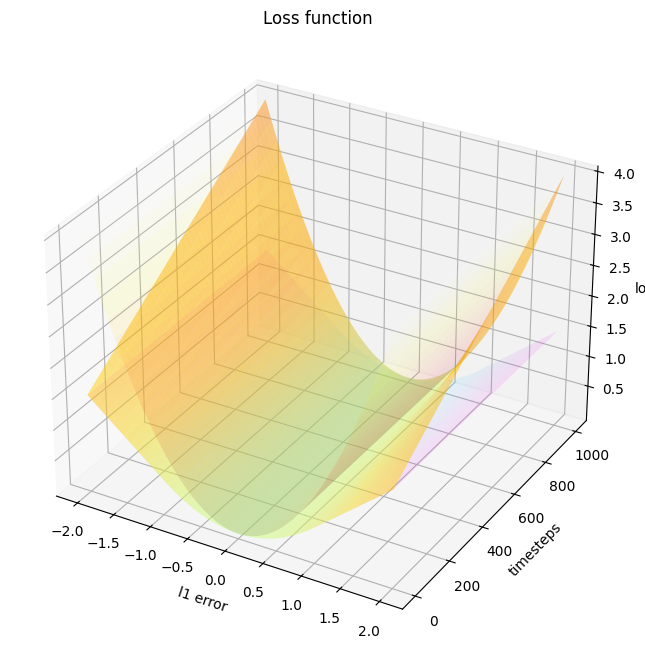

In [261]:
#markdown 
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import math
from matplotlib import cm

def normalize_tensor(tensor):
    min_val = torch.min(tensor)
    max_val = torch.max(tensor)
    normalized_tensor = (tensor - min_val) / (max_val - min_val)
    return normalized_tensor

huber_delta = 1
huber_c = 0.1

timesteps = 1000
nx, ny = (100, 100)
min_err, max_err = -2, 2

X = torch.linspace(min_err, max_err, nx).unsqueeze(0)
X = X.expand(ny, -1)
Y = torch.linspace(0, timesteps, ny).unsqueeze(1)
Y = Y.expand(-1, nx)

Z_l1 = torch.abs(X) # L1
Z_l2 = X**2 # L2
#Z_l2 = normalize_tensor(Z_l2)
Z_huber = F.huber_loss(X, torch.zeros_like(X), delta=huber_delta, reduction='none')
# normalize Z_huber
#Z_huber = normalize_tensor(Z_huber)
Z_interpolated = Z_huber * (1 - Y/timesteps) + (Z_l2 * Y/timesteps)

# print(f"X: {X}")
# print(f"Y: {Y}")
# print(f"Z: {Z}")

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d', title='Loss function')

# Plot the surface.
surf_l2 = ax.plot_surface(X, Y, Z_l2, cmap=cm.hot,
                       linewidth=0, antialiased=True, alpha=0.1, label='l2')
surf_huber = ax.plot_surface(X, Y, Z_huber, cmap=cm.cool,
                          linewidth=0, antialiased=True, alpha=0.1, label='huber')
surf_interpolated = ax.plot_surface(X, Y, Z_interpolated, cmap=cm.Wistia,
                       linewidth=0, antialiased=True, alpha=0.5, label='interpolated')


ax.set_xlabel('l1 error')
ax.set_ylabel('timesteps')
ax.set_zlabel('loss')

plt.show()
